### Exploratory Data Analysis

#### libraries

In [2]:
import os

import shutil
import keras
import random
import keras_cv
import warnings
from PIL import Image
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.metrics import accuracy_score
from keras.utils import image_dataset_from_directory

/Users/loubenskybelile/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/loubenskybelile/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
warnings.filterwarnings("ignore")

In [4]:
# Reproducability
tf.keras.utils.set_random_seed(69)

#### viewing directory

In [5]:
waste_type_dir = []

for (root, dirs, files) in os.walk('waste-images'):
    waste_type_dir.append(root)

waste_type_dir
        

['waste-images',
 'waste-images/disposable_plastic_cutlery',
 'waste-images/food_waste',
 'waste-images/test',
 'waste-images/test/Food Waste',
 'waste-images/test/Trash',
 'waste-images/test/Mixed Recycle',
 'waste-images/office_paper',
 'waste-images/glass_food_jars',
 'waste-images/aluminum_soda_cans',
 'waste-images/magazines',
 'waste-images/clothing',
 'waste-images/plastic_shopping_bags',
 'waste-images/plastic_soda_bottles',
 'waste-images/styrofoam_food_containers',
 'waste-images/aerosol_cans',
 'waste-images/aluminum_food_cans',
 'waste-images/newspaper',
 'waste-images/eggshells',
 'waste-images/glass_cosmetic_containers',
 'waste-images/paper_cups',
 'waste-images/plastic_water_bottles',
 'waste-images/coffee_grounds',
 'waste-images/steel_food_cans',
 'waste-images/plastic_cup_lids',
 'waste-images/cardboard_packaging',
 'waste-images/cardboard_boxes',
 'waste-images/plastic_straws',
 'waste-images/train',
 'waste-images/train/Food Waste',
 'waste-images/train/Trash',
 'w

In [6]:
waste_type_dir = waste_type_dir[1:]

In [7]:
print(waste_type_dir)

['waste-images/disposable_plastic_cutlery', 'waste-images/food_waste', 'waste-images/test', 'waste-images/test/Food Waste', 'waste-images/test/Trash', 'waste-images/test/Mixed Recycle', 'waste-images/office_paper', 'waste-images/glass_food_jars', 'waste-images/aluminum_soda_cans', 'waste-images/magazines', 'waste-images/clothing', 'waste-images/plastic_shopping_bags', 'waste-images/plastic_soda_bottles', 'waste-images/styrofoam_food_containers', 'waste-images/aerosol_cans', 'waste-images/aluminum_food_cans', 'waste-images/newspaper', 'waste-images/eggshells', 'waste-images/glass_cosmetic_containers', 'waste-images/paper_cups', 'waste-images/plastic_water_bottles', 'waste-images/coffee_grounds', 'waste-images/steel_food_cans', 'waste-images/plastic_cup_lids', 'waste-images/cardboard_packaging', 'waste-images/cardboard_boxes', 'waste-images/plastic_straws', 'waste-images/train', 'waste-images/train/Food Waste', 'waste-images/train/Trash', 'waste-images/train/Mixed Recycle', 'waste-images

In [ ]:
# # restructuring directory
# # Define the working directory (where images are stored)
# working_directory = "waste-images\\images\\images"

# # Define the base directory where categories will be moved to
# base_directory = "waste-images"

# # Iterate through each category folder under the 'images/images' directory
# for category in os.listdir(working_directory):
#     category_path = os.path.join(working_directory, category)
    
#     # Check if it's a directory (should be the category folder)
#     if os.path.isdir(category_path):
        
#         # Create the category folder in the base directory if it doesn't exist
#         new_category_path = os.path.join(base_directory, category)
#         os.makedirs(new_category_path, exist_ok=True)

#         # Iterate through 'default' and 'real_world' subdirectories inside each category
#         for subfolder in ['default', 'real_world']:
#             subfolder_path = os.path.join(category_path, subfolder)
            
#             # Check if the subfolder exists
#             if os.path.exists(subfolder_path):
#                 # Iterate through all image files in the subfolder
#                 for img_file in os.listdir(subfolder_path):
#                     img_path = os.path.join(subfolder_path, img_file)
                    
#                     # Define the new file path in the base category directory
#                     new_img_path = os.path.join(new_category_path, f"{subfolder}_{img_file}")
                    
#                     # Copy the file to the new category directory
#                     shutil.copy(img_path, new_img_path)
                    
#                     # Optionally, you can delete the original file after copying
#                     os.remove(img_path)
                
#                 # After copying, you can remove the empty subdirectory (if you want to clean up)
#                 os.rmdir(subfolder_path)

# print("Images successfully moved and subdirectories cleaned.")

In [ ]:
# # Function to count images per subfolder
# def count_images_per_folder(waste_type_dir):
#     for category_path in waste_type_dir:
#         category_name = os.path.basename(category_path)  # Extract category name
#         print(f"Category: {category_name}")

#         # Check for "default" and "real_world" subfolders
#         default_path = os.path.join(category_path, "default")
#         real_world_path = os.path.join(category_path, "real_world")

#         if not os.path.exists(default_path) or not os.path.exists(real_world_path):
#             print(f"  Missing subfolders in {category_name}. Expected 'default' and 'real_world'.")
#             continue

#         # Count images in each subfolder
#         default_images = len([f for f in os.listdir(default_path) if os.path.isfile(os.path.join(default_path, f))])
#         real_world_images = len([f for f in os.listdir(real_world_path) if os.path.isfile(os.path.join(real_world_path, f))])

#         # Output results
#         print(f"  Default: {default_images} images")
#         print(f"  Real World: {real_world_images} images")

#         # Verify expected count
#         if default_images != 250 or real_world_images != 250:
#             print(f"  WARNING: Expected 250 images in each folder, but found {default_images} (default) and {real_world_images} (real_world).")

# # Run the function
# count_images_per_folder(waste_type_dir)


### Assumption: All materials are food and beverage free
Also..talk about liquid disposal fountain next to the trash

In [8]:
food_waste = ['coffee_grounds','eggshells', 'food_waste', 'tea_bags']
mixed_recycle = ['aluminum_food_cans', 'aluminum_soda_cans', 'aerosol_cans', 'cardboard_boxes', 'cardboard_packaging','glass_beverage_bottles', 'glass_cosmetic_containers', 'glass_food_jars', 'magazines', 'newspaper', 'office_paper', 'plastic_detergent_bottles', 'plastic_food_containers', 'plastic_soda_bottles', 'plastic_water_bottles','steel_food_cans']
trash = ['clothes','styrofoam_cups', 'styrofoam_food_containers', 'disposable_plastic_cutlery', 'paper_cups', 'paper_cup_lids', 'plastic_shopping_bags','plastic_straws', 'plastic_trash_bags', 'shoes' ]

In [9]:
if len(food_waste) + len(mixed_recycle) + len(trash) == len(waste_type_dir):
    print("All categories included!")

In [10]:
# Function to map materials to their directories
def map_to_directories(materials, directories):
    return [dir_path for dir_path in directories if dir_path.split('/')[-1] in materials]

# Map each list to directories
food_waste_dirs = map_to_directories(food_waste, waste_type_dir)
mixed_recycle_dirs = map_to_directories(mixed_recycle, waste_type_dir)
trash_dirs = map_to_directories(trash, waste_type_dir)

# Print results
print("Food Waste Directories:", food_waste_dirs)
print("Mixed Recycle Directories:", mixed_recycle_dirs)
print("Trash Directories:", trash_dirs)

Food Waste Directories: ['waste-images/food_waste', 'waste-images/eggshells', 'waste-images/coffee_grounds', 'waste-images/tea_bags']
Mixed Recycle Directories: ['waste-images/office_paper', 'waste-images/glass_food_jars', 'waste-images/aluminum_soda_cans', 'waste-images/magazines', 'waste-images/plastic_soda_bottles', 'waste-images/aerosol_cans', 'waste-images/aluminum_food_cans', 'waste-images/newspaper', 'waste-images/glass_cosmetic_containers', 'waste-images/plastic_water_bottles', 'waste-images/steel_food_cans', 'waste-images/cardboard_packaging', 'waste-images/cardboard_boxes', 'waste-images/glass_beverage_bottles', 'waste-images/plastic_food_containers', 'waste-images/plastic_detergent_bottles']
Trash Directories: ['waste-images/disposable_plastic_cutlery', 'waste-images/plastic_shopping_bags', 'waste-images/styrofoam_food_containers', 'waste-images/paper_cups', 'waste-images/plastic_straws', 'waste-images/styrofoam_cups', 'waste-images/shoes', 'waste-images/plastic_trash_bags']

In [11]:
# verify if all categories' working directory was matched
print("Food Waste: ", len(food_waste_dirs)==len(food_waste))
print("Mixed Recycling: ", len(mixed_recycle_dirs)==len(mixed_recycle))
print("Trash: ", len(trash_dirs)==len(trash_dirs))

Food Waste:  True
Mixed Recycling:  True
Trash:  True


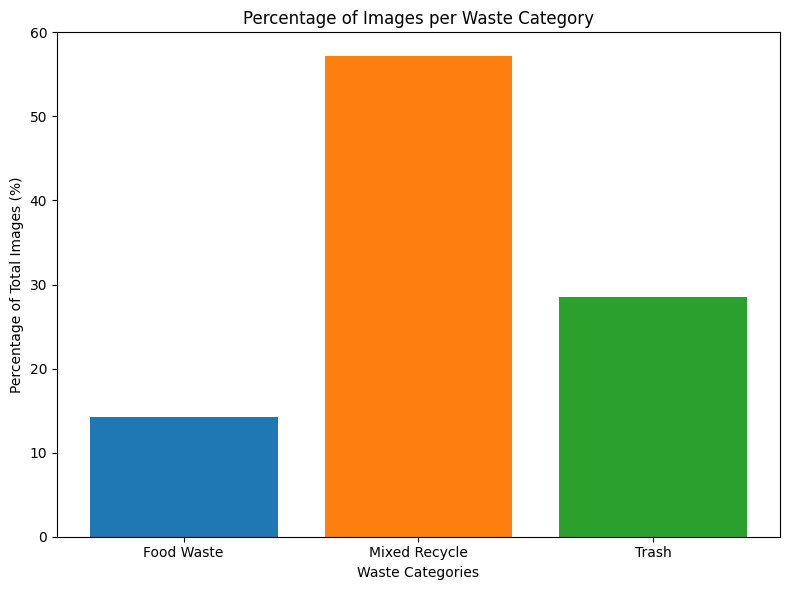

In [12]:
# Function to count total images in default and real_world subdirectories for a category
def count_total_images(category_dirs):
    total_images = 0
    for dir_path in category_dirs:

        # Count images in default and real_world subdirectories
        default_count = len([f for f in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, f))]) if os.path.exists(dir_path) else 0
        # Add to total count
        total_images += (default_count)
    return total_images

# Calculate total image counts for each category
food_waste_total = count_total_images(food_waste_dirs)
mixed_recycle_total = count_total_images(mixed_recycle_dirs)
trash_total = count_total_images(trash_dirs)

# Calculate total images across all categories
overall_total = food_waste_total + mixed_recycle_total + trash_total

# Calculate percentages
categories = ['Food Waste', 'Mixed Recycle', 'Trash']
percentages = [
    (food_waste_total / overall_total) * 100,
    (mixed_recycle_total / overall_total) * 100,
    (trash_total / overall_total) * 100
]

# Create the bar plot
plt.figure(figsize=(8, 6))
plt.bar(categories, percentages, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.xlabel('Waste Categories')
plt.ylabel('Percentage of Total Images (%)')
plt.title('Percentage of Images per Waste Category')
plt.tight_layout()
plt.show()

### Using GANs to Create Synthetic Food Waste Images 

In [ ]:
# Preprocessing function to load and resize images
def load_images_from_dirs(dirs, image_size=(64, 64)):
    images = []
    for dir_path in dirs:
        for img_file in os.listdir(dir_path):
            img_path = os.path.join(dir_path, img_file)
            try:
                img = Image.open(img_path).convert("RGB")  # Ensure all images are RGB
                img = img.resize(image_size)  # Resize to target size
                images.append(np.array(img))
            except Exception as e:
                print(f"Error loading image {img_path}: {e}")
    return np.array(images)
# Load images for each category
food_waste_images = load_images_from_dirs(food_waste_dirs)
mixed_recycle_images = load_images_from_dirs(mixed_recycle_dirs)
trash_images = load_images_from_dirs(trash_dirs)

# Normalize image data (-1 to 1 range) because we are using Tanh activation in the last layer of the model
food_waste_images = (food_waste_images / 127.5) - 1.0
mixed_recycle_images = (mixed_recycle_images / 127.5) - 1.0
trash_images = (trash_images / 127.5) - 1.0




In [ ]:
print(f"Food Waste Images Shape: {food_waste_images.shape}, dtype: {food_waste_images.dtype}")


In [ ]:
import matplotlib.pyplot as plt

# Function to display images
def show_images(images, title, n=5):
    plt.figure(figsize=(15, 5))
    for i in range(min(n, len(images))):
        plt.subplot(1, n, i + 1)
        plt.imshow(images[i])
        plt.axis('off')
    plt.suptitle(title, fontsize=16)
    plt.show()

# Show some images from each category
show_images(food_waste_images, "Food Waste Images")
show_images(mixed_recycle_images, "Mixed Recycle Images")
show_images(trash_images, "Trash Images")


# GAN Architecture: 
* Generator: 
    * What It Does: Generates synthetic images from random noise.
    * Purpose: Learns to create images that are indistinguishable from real ones.
    * Why It's Important: Produces new data for augmentation, which helps balance your dataset.Takes random noise as input and generates images.
* Discriminator: Takes real or generated images as input and predicts whether they are real or fake.
    * What It Does: Classifies images as real or fake.
    * Purpose: Helps the generator improve its ability to produce realistic images.
    * Why It's Important: Provides feedback to the generator, guiding it towards producing better images.
* GAN: Combines the generator and discriminator to train the generator to produce more realistic images.


In [ ]:
# GAN architecture 
from tensorflow.keras import layers, Sequential


def build_generator(latent_dim):
    model = tf.keras.Sequential([
        layers.Dense(128 * 16 * 16, activation="relu", input_dim=latent_dim),  # Adjust size
        layers.Reshape((16, 16, 128)),  # Adjust to (16, 16, 128)
        layers.Conv2DTranspose(128, kernel_size=4, strides=2, padding="same", activation="relu"),  # Upsample to (32, 32, 128)
        layers.Conv2DTranspose(128, kernel_size=4, strides=2, padding="same", activation="relu"),  # Upsample to (64, 64, 128)
        layers.Conv2D(3, kernel_size=7, activation="tanh", padding="same")  # Final output (64, 64, 3)
    ])
    return model



def build_discriminator(image_shape):
    model = Sequential([
        layers.Conv2D(64, kernel_size=4, strides=2, padding="same", input_shape=image_shape),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(128, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Flatten(),
        layers.Dense(1, activation="sigmoid")  # Binary classification (real/fake)
    ])
    return model


In [ ]:
latent_dim = 100
generator = build_generator(latent_dim)
test_noise = tf.random.normal([1, latent_dim])  # Single random noise vector
generated_image = generator(test_noise)
print(f"Generator output shape: {generated_image.shape}")


This step combines the Generator and Discriminator into a complete GAN system so that the Generator can learn through feedback from the Discriminator.
* Frozen Discriminator: During GAN training, the discriminator's weights are "frozen" (non-trainable). This ensures that only the generator is updated during this phase. The discriminator indirectly trains the generator by providing signals on how well it is "fooling" it.

In [ ]:


import tensorflow as tf

latent_dim = 100  # Size of noise vector
image_shape = (64, 64, 3)  # Image dimensions

# Instantiate models
generator = build_generator(latent_dim)
discriminator = build_discriminator(image_shape)

# Compile discriminator
discriminator.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Build and compile GAN
discriminator.trainable = False  # Freeze discriminator weights for GAN training
gan_input = layers.Input(shape=(latent_dim,))
generated_image = generator(gan_input)
gan_output = discriminator(generated_image)
gan = tf.keras.Model(gan_input, gan_output)
gan.compile(optimizer="adam", loss="binary_crossentropy")


In [ ]:
generator.summary()  # Prints a textual summary of the generator model
tf.keras.utils.plot_model(generator, show_shapes=True, to_file="generator_architecture.png")


In [ ]:
discriminator.summary()  # Prints a textual summary of the discriminator model
tf.keras.utils.plot_model(discriminator, show_shapes=True, to_file="discriminator_architecture.png")


In [ ]:
gan.summary()  # Prints a textual summary of the GAN model
tf.keras.utils.plot_model(gan, show_shapes=True, to_file="gan_architecture.png")


Training a GAN involves a balance between improving both the Generator and the Discriminator. Here's how this happens:
* Step 1: Train the Discriminator
    * Goal: Make the discriminator better at distinguishing real images from fake images.
    * Process:
        * Select a batch of real images from the dataset.
        * Generate a batch of fake images using the generator.
        * Train the discriminator on both:
        *Real images (label: 1)
Fake images (label: 0)
Loss Function: Binary cross-entropy, which evaluates how well the discriminator predicts the labels.
Step 2: Train the Generator (via the GAN model)
Goal: Make the generator produce more realistic images to "fool" the discriminator.
Process:
Generate random noise vectors.
Use the generator to create synthetic images.
Pass these images through the discriminator (via the GAN model).
Train the generator with a label of 1 (it tries to make the discriminator believe the fake images are real).
Why Is the Discriminator Frozen? The generator relies on the discriminator's feedback to improve, but we do not want the discriminator to learn during this step. The focus is solely on improving the generator.

In [ ]:
food_waste_images.shape

In [ ]:
import numpy as np

def train_gan(generator, discriminator, gan, real_images, epochs=10000, batch_size=64):
    latent_dim = generator.input_shape[1]
    half_batch = batch_size // 2

    for epoch in range(epochs):
        try:
            # Train discriminator
            idx = np.random.randint(0, real_images.shape[0], half_batch)
            real_samples = real_images[idx]
            noise = np.random.normal(0, 1, (half_batch, latent_dim))
            fake_samples = generator.predict(noise)
            real_labels = np.ones((half_batch, 1))
            fake_labels = np.zeros((half_batch, 1))

            # Debugging shapes
            print(f"Epoch {epoch}: Real {real_samples.shape}, Fake {fake_samples.shape}")
            print(f"Real labels: {real_labels.shape}, Fake labels: {fake_labels.shape}")

            d_loss_real = discriminator.train_on_batch(real_samples, real_labels)
            d_loss_fake = discriminator.train_on_batch(fake_samples, fake_labels)

            # Train generator (via GAN model)
            noise = np.random.normal(0, 1, (batch_size, latent_dim))
            misleading_labels = np.ones((batch_size, 1))
            g_loss = gan.train_on_batch(noise, misleading_labels)

            # Print progress every 100 epochs
            if epoch % 100 == 0:
                print(f"Epoch {epoch} | D Loss: {d_loss_real[0] + d_loss_fake[0]} | G Loss: {g_loss}")
        except Exception as e:
            print(f"Error at epoch {epoch}: {e}")

# Train GAN using food waste images
train_gan(generator, discriminator, gan, food_waste_images, epochs=5000, batch_size=32)


In [ ]:
# Generate synthetic images
noise = np.random.normal(0, 1, (10, latent_dim))  # Generate 10 samples
synthetic_images = generator.predict(noise)

# Save generated images
for i, img in enumerate(synthetic_images):
    img = (img * 255).astype(np.uint8)  # Rescale to 0-255
    Image.fromarray(img).save(f"synthetic_image_{i}.png")


In [ ]:
# Generate synthetic images
noise = np.random.normal(0, 1, (10, latent_dim))  # Generate 10 samples
synthetic_images = generator.predict(noise)

# Save generated images
for i, img in enumerate(synthetic_images):
    img = (img * 255).astype(np.uint8)  # Rescale to 0-255
    Image.fromarray(img).save(f"synthetic_image_{i}.png")


Model Building -- (GPT reccomended creating genators for the train and val data before)

* Convolutional Layers (Conv2D): Extract features from images by applying filters.
* MaxPooling Layers (MaxPooling2D): Reduce the spatial dimensions of feature maps to focus on key features.
* Dropout Layers: Reduce overfitting by randomly disabling neurons during training.
* Fully Connected Layer (Dense): Combines all extracted features to classify the images.
* Output Layer: The softmax activation ensures probabilities for the 3 categories.

In [ ]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# model = Sequential([
#     # First convolutional block
#     Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),  # 32 filters, 3x3 kernel
#     MaxPooling2D(pool_size=(2, 2)),  # Downsample feature maps by 2x2
#     Dropout(0.25),  # Randomly disable 25% of neurons to prevent overfitting

#     # Second convolutional block
#     Conv2D(64, (3, 3), activation='relu'),  # 64 filters, 3x3 kernel
#     MaxPooling2D(pool_size=(2, 2)),  # Downsample again
#     Dropout(0.25),

#     # Flatten and fully connected layers
#     Flatten(),  # Flatten the 2D fpeature maps into 1D
#     Dense(128, activation='relu'),  # Fully connected layer with 128 neurons
#     Dropout(0.5),  # 50% dropout for regularization

#     # Output layer
#     Dense(3, activation='softmax')  # Final layer for 3 categories (food waste, mixed recycling, trash)
# ])

In [13]:
import torch
import pandas as pd
from PIL import Image

# Load the YOLOv5 model (pre-trained on COCO dataset)
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')  # Use 'yolov5s' for a small, fast model

# Path to the input image (replace with your image path)
image_path = 'waste-images/paper_cups/default_Image_186.png'

# Debug: Check the input image
img = Image.open(image_path)
img.show() 

# Run inference
results = model(image_path)  # Perform object detection

# Get detections as a Pandas DataFrame
detections = results.pandas().xyxy[0]

# Filter detections by confidence threshold (e.g., 0.25)
confidence_threshold = 0.25
filtered_detections = detections[detections['confidence'] > confidence_threshold]

# Display filtered detections
if filtered_detections.empty:
    print("No objects detected above the confidence threshold.")
else:
    print("Filtered Detections:")
    print(filtered_detections)

# Save detections to a CSV file
filtered_detections.to_csv('filtered_detections.csv', index=False)
print("Filtered detections saved to filtered_detections.csv")

Using cache found in /Users/loubenskybelile/.cache/torch/hub/ultralytics_yolov5_master


requirements: Ultralytics requirements ['gitpython>=3.1.30', 'setuptools>=70.0.0'] not found, attempting AutoUpdate...

requirements: AutoUpdate success ✅ 2.2s, installed 2 packages: ['gitpython>=3.1.30', 'setuptools>=70.0.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect



YOLOv5 🚀 2024-12-8 Python-3.9.6 torch-2.5.1 CPU

100%|██████████| 14.1M/14.1M [00:01<00:00, 11.1MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


Filtered Detections:
        xmin       ymin        xmax        ymax  confidence  class  name
0  82.202858  49.422218  181.709503  197.195633    0.668750     41   cup
1   0.131876  84.751144   56.802284  196.373810    0.333541     45  bowl
Filtered detections saved to filtered_detections.csv


In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Define the paths for each category
food_waste_dirs = ['waste-images/food_waste', 'waste-images/eggshells', 'waste-images/coffee_grounds', 'waste-images/tea_bags']
mixed_recycle_dirs = ['waste-images/office_paper', 'waste-images/glass_food_jars', 'waste-images/aluminum_soda_cans', 
                      'waste-images/magazines', 'waste-images/plastic_soda_bottles', 'waste-images/aerosol_cans',
                      'waste-images/aluminum_food_cans', 'waste-images/newspaper', 'waste-images/glass_cosmetic_containers',
                      'waste-images/plastic_water_bottles', 'waste-images/steel_food_cans', 'waste-images/cardboard_packaging',
                      'waste-images/cardboard_boxes', 'waste-images/glass_beverage_bottles', 'waste-images/plastic_food_containers',
                      'waste-images/plastic_detergent_bottles']
trash_dirs = ['waste-images/disposable_plastic_cutlery', 'waste-images/plastic_shopping_bags', 'waste-images/styrofoam_food_containers', 
              'waste-images/paper_cups', 'waste-images/plastic_straws', 'waste-images/styrofoam_cups', 'waste-images/shoes', 
              'waste-images/plastic_trash_bags']

# Combine into categories
categories = {
    'Food Waste': food_waste_dirs,
    'Mixed Recycle': mixed_recycle_dirs,
    'Trash': trash_dirs
}

# Output directories
train_dir = 'waste-images/train'
val_dir = 'waste-images/val'
test_dir = 'waste-images/test'
split_ratios = (0.7, 0.2, 0.1)  # Train, validation, and test ratios

# Create train, validation, and test directories
for output_dir in [train_dir, val_dir, test_dir]:
    os.makedirs(output_dir, exist_ok=True)
    for category in categories.keys():
        os.makedirs(os.path.join(output_dir, category), exist_ok=True)

# Process and split data
for category, subcategories in categories.items():
    for sub_dir in subcategories:
        if not os.path.exists(sub_dir):
            print(f"Warning: Subcategory folder '{sub_dir}' does not exist. Skipping...")
            continue

        # Get list of images
        images = [os.path.join(sub_dir, img) for img in os.listdir(sub_dir) if img.endswith(('png', 'jpg', 'jpeg'))]

        # Split images into train, validation, and test sets
        train_images, temp_images = train_test_split(images, train_size=split_ratios[0], random_state=42)
        val_images, test_images = train_test_split(temp_images, test_size=split_ratios[2] / (split_ratios[1] + split_ratios[2]), random_state=42)

        # Copy images to the appropriate directories
        train_sub_dir = os.path.join(train_dir, category)
        val_sub_dir = os.path.join(val_dir, category)
        test_sub_dir = os.path.join(test_dir, category)

        for img_path in train_images:
            shutil.copy(img_path, train_sub_dir)
        for img_path in val_images:
            shutil.copy(img_path, val_sub_dir)
        for img_path in test_images:
            shutil.copy(img_path, test_sub_dir)

        print(f"Processed {len(images)} images from '{sub_dir}' into '{category}'.")

print("Folder creation and image splitting completed successfully.")





In [19]:
import os
print("Train directory contents:", os.listdir(train_dir))
print("Validation directory contents:", os.listdir(val_dir))


Train directory contents: ['Food Waste', 'Trash', 'Mixed Recycle']
Validation directory contents: ['Food Waste', 'Trash', 'Mixed Recycle']


In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

# Define the model architecture
def build_waste_classification_model(input_shape, num_classes):
    model = Sequential([
        # Convolutional Layers
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.2),
        
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.3),
        
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.4),
        
        # Flatten and Fully Connected Layers
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')  # Output layer with softmax activation
    ])
    return model

# Data augmentation
def create_data_generators(train_dir, val_dir, image_size, batch_size):
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True
    )
    val_datagen = ImageDataGenerator(rescale=1./255)

    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='categorical'
    )
    val_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='categorical'
    )
    return train_generator, val_generator

# Define parameters
input_shape = (64, 64, 3)  # Image size (height, width, channels)
num_classes = 3  # Food Waste, Mixed Recycle, Trash
learning_rate = 0.001
batch_size = 32
epochs = 20
train_dir = 'waste-images/train'
val_dir = 'waste-images/val'


# Create model
model = build_waste_classification_model(input_shape, num_classes)
model.compile(optimizer=Adam(learning_rate=learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Generate data
train_generator, val_generator = create_data_generators(train_dir, val_dir, (64, 64), batch_size)

# Train the model
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator
)

# Save the model
model.save('waste_classification_model.h5')


Found 1050 images belonging to 3 classes.
Found 300 images belonging to 3 classes.
Epoch 1/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 9s 181ms/step - accuracy: 0.4006 - loss: 1.1151 - val_accuracy: 0.5033 - val_loss: 0.9949
Epoch 2/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 8s 250ms/step - accuracy: 0.5717 - loss: 0.9224 - val_accuracy: 0.5867 - val_loss: 0.8574
Epoch 3/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 201ms/step - accuracy: 0.6318 - loss: 0.8480 - val_accuracy: 0.7133 - val_loss: 0.6631
Epoch 4/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 213ms/step - accuracy: 0.6697 - loss: 0.7845 - val_accuracy: 0.6933 - val_loss: 0.7635
Epoch 5/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 6s 176ms/step - accuracy: 0.7329 - loss: 0.6845 - val_accuracy: 0.7767 - val_loss: 0.5642
Epoch 6/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 160ms/step - accuracy: 0.7420 - loss: 0.6594 - val_accuracy: 0.7467 - val_loss: 0.6190
Epoch 7/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 157ms/step - accuracy: 0.7660 - loss: 0.6123 - val_accuracy: 0.7500 - val_loss: 0.6332
Epoch 8/20
33/33 ━━━━

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

# Define the model architecture
def build_waste_classification_model(input_shape, num_classes):
    model = Sequential([
        # Convolutional Layers
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.2),
        
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.3),
        
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.7),
        
        # Flatten and Fully Connected Layers
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.6),
        Dense(num_classes, activation='softmax')  # Output layer with softmax activation
    ])
    return model

# Data augmentation
def create_data_generators(train_dir, val_dir, image_size, batch_size):
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True
    )
    val_datagen = ImageDataGenerator(rescale=1./255)

    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='categorical'
    )
    val_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='categorical'
    )
    return train_generator, val_generator

# Define parameters
input_shape = (64, 64, 3)  # Image size (height, width, channels)
num_classes = 3  # Food Waste, Mixed Recycle, Trash
learning_rate = 0.001
batch_size = 16
epochs = 30
train_dir = 'waste-images/train'
val_dir = 'waste-images/val'


# Create model
model = build_waste_classification_model(input_shape, num_classes)
model.compile(optimizer=Adam(learning_rate=learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Generate data
train_generator, val_generator = create_data_generators(train_dir, val_dir, (64, 64), batch_size)

# Train the model
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator
)

# Save the model
model.save()


Found 1050 images belonging to 3 classes.
Found 300 images belonging to 3 classes.
Epoch 1/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 67ms/step - accuracy: 0.3686 - loss: 1.1560 - val_accuracy: 0.4200 - val_loss: 1.0450
Epoch 2/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.4280 - loss: 1.0472 - val_accuracy: 0.5833 - val_loss: 0.9312
Epoch 3/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.6018 - loss: 0.9062 - val_accuracy: 0.6233 - val_loss: 0.8257
Epoch 4/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.6468 - loss: 0.8604 - val_accuracy: 0.6467 - val_loss: 0.7547
Epoch 5/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.6770 - loss: 0.7934 - val_accuracy: 0.7233 - val_loss: 0.6485
Epoch 6/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.7261 - loss: 0.6823 - val_accuracy: 0.7333 - val_loss: 0.6639
Epoch 7/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.7307 - loss: 0.6670 - val_accuracy: 0.7700 - val_loss: 0.6059
Epoch 8/30
66/66 ━━━━━━━━━━━

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

# Define the test directory
test_dir = 'waste-images/test'  # Replace with your test directory path

# Create the test data generator
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(64, 64),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Loss: {test_loss}")


Found 150 images belonging to 3 classes.
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 0.9076 - loss: 0.2779
Test Accuracy: 0.8933333158493042
Test Loss: 0.296490341424942


In [18]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


In [20]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Get predictions
y_true = test_generator.classes
y_pred = np.argmax(model.predict(test_generator), axis=-1)

# Confusion matrix
print(confusion_matrix(y_true, y_pred))

# Classification report
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step
[[46  1  3]
 [ 3 46  1]
 [ 5  3 42]]
               precision    recall  f1-score   support

   Food Waste       0.85      0.92      0.88        50
Mixed Recycle       0.92      0.92      0.92        50
        Trash       0.91      0.84      0.88        50

     accuracy                           0.89       150
    macro avg       0.89      0.89      0.89       150
 weighted avg       0.89      0.89      0.89       150



In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Get class indices from the test generator
class_labels = list(test_generator.class_indices.keys())

# Get predictions
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Actual classes
true_classes = test_generator.classes

# Get file paths for test images
test_images = test_generator.filepaths

# Plot some images with their predicted and actual labels
def plot_predictions(images, true_labels, predicted_labels, class_labels, num_images=10):
    plt.figure(figsize=(15, num_images * 3))
    for i in range(num_images):
        plt.subplot(num_images // 5 + 1, 5, i + 1)
        img = plt.imread(images[i])
        plt.imshow(img)
        plt.axis('off')
        plt.title(
            f"True: {class_labels[true_labels[i]]}\nPred: {class_labels[predicted_labels[i]]}",
            color="green" if true_labels[i] == predicted_labels[i] else "red"
        )
    plt.tight_layout()
    plt.show()

# Call the function to plot
plot_predictions(test_images, true_classes, predicted_classes, class_labels, num_images=10)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step


In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Get class indices from the test generator
class_labels = list(test_generator.class_indices.keys())

# Get predictions
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Actual classes
true_classes = test_generator.classes

# Get file paths for test images
test_images = test_generator.filepaths

# Function to plot images with predictions
def plot_all_predictions(images, true_labels, predicted_labels, class_labels, batch_size=20):
    num_images = len(images)
    plt.figure(figsize=(15, batch_size // 5 * 3))
    for i in range(num_images):
        plt.subplot((num_images // 5) + 1, 5, i + 1)
        img = plt.imread(images[i])
        plt.imshow(img)
        plt.axis('off')
        plt.title(
            f"True: {class_labels[true_labels[i]]}\nPred: {class_labels[predicted_labels[i]]}",
            color="green" if true_labels[i] == predicted_labels[i] else "red",
            fontsize=10
        )
    plt.tight_layout()
    plt.show()

# Call the function to plot all test images
plot_all_predictions(test_images, true_classes, predicted_classes, class_labels)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step


In [23]:
import plotly.express as px

# Get class labels and predictions
class_labels = list(test_generator.class_indices.keys())
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Create a DataFrame for visualization
data = pd.DataFrame({
    'Image Path': test_generator.filepaths,
    'True Label': [class_labels[i] for i in test_generator.classes],
    'Predicted Label': [class_labels[i] for i in predicted_classes],
    'Correct': predicted_classes == test_generator.classes
})

# Add confidence scores for predictions
data['Confidence'] = predictions.max(axis=1)

# Function to display interactive scrollable visualization
def display_scrollable_predictions(data, num_images=20):
    # Select a subset for display (or the entire dataset)
    display_data = data.sample(n=num_images)  # Random sample of predictions
    display_data['Image'] = display_data['Image Path'].apply(lambda path: f"<img src='{path}' style='max-width:150px;'>")
    
    fig = px.scatter(
        display_data,
        x='Confidence',
        y='True Label',
        color='Correct',
        hover_data={
            'Image Path': False,
            'True Label': True,
            'Predicted Label': True,
            'Confidence': ':.2f',
            'Image': True
        },
        title='Model Predictions'
    )
    fig.update_traces(marker=dict(size=10), hovertemplate="%{customdata[0]}<br>True: %{customdata[1]}<br>Pred: %{customdata[2]}<br>Conf: %{customdata[3]}")
    fig.show()

# Display predictions
display_scrollable_predictions(data, num_images=100)  # Customize num_images


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step


In [ ]:
from IPython.core.display import display, HTML
import pandas as pd
from PIL import Image
import base64

# Get class labels and predictions
class_labels = list(test_generator.class_indices.keys())
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Create a DataFrame for organization
data = pd.DataFrame({
    'Image Path': test_generator.filepaths,
    'True Label': [class_labels[i] for i in test_generator.classes],
    'Predicted Label': [class_labels[i] for i in predicted_classes],
    'Confidence': predictions.max(axis=1),
    'Correct': predicted_classes == test_generator.classes
})

# Helper function to encode images in base64 for HTML display
def encode_image(image_path):
    with open(image_path, "rb") as img_file:
        return base64.b64encode(img_file.read()).decode("utf-8")

# Add the base64-encoded image to the DataFrame for display
data['Image HTML'] = data['Image Path'].apply(
    lambda path: f"<img src='data:image/jpeg;base64,{encode_image(path)}' style='width:100px;height:100px;'>"
)

# Group data by categories
def generate_grouped_html(data):
    html = "<h1>Model Predictions Grouped by Category</h1>"
    for category in class_labels:
        html += f"<h2>{category}</h2>"
        subset = data[data['True Label'] == category]
        if subset.empty:
            html += "<p>No images in this category.</p>"
        else:
            html += subset[['Image HTML', 'True Label', 'Predicted Label', 'Confidence', 'Correct']].to_html(
                escape=False,
                index=False
            )
    return html

# Display predictions grouped by category
html_content = generate_grouped_html(data)
display(HTML(html_content))


Image detection Attempt


In [ ]:
 import torch
import pandas as pd
from PIL import Image

# Load YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')  # Pre-trained on COCO

# Path to input image
image_path = '/mnt/data/real_world_Image_223.png'

# Debug: Check the input image
img = Image.open(image_path)
img.show()

# Run inference with a lower confidence threshold
results = model(image_path, conf=0.25)  # Reduce confidence threshold to 25%

# Display results
results.show()  # Opens image with bounding boxes

# Check if detections are present
detections = results.pandas().xyxy[0]
if detections.empty:
    print("No objects detected.")
else:
    print("Detections:")
    print(detections)

# Save detections to a CSV file
detections.to_csv('detections.csv', index=False)
print("Detections saved to detections.csv")


### FINE TUNING

In [25]:
import tensorflow as tf
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# Define paths
train_dir = 'waste-images/train'  # Update this path
val_dir = 'waste-images/val'      # Update this path
test_dir = 'waste-images/test'    # Update this path
base_model_path = 'waste_classification_model.h5'  # Path to your base model

# Define parameters
image_size = (64, 64)
batch_size = 32
num_classes = 3
epochs = 20

# Load the base model
base_model = load_model(base_model_path)

# Data Generators
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Visualization Function
def plot_history(history, experiment_name):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{experiment_name}: Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{experiment_name}: Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

def evaluate_model(model, experiment_name):
    test_loss, test_accuracy = model.evaluate(test_generator)
    print(f"{experiment_name} - Test Accuracy: {test_accuracy}")
    print(f"{experiment_name} - Test Loss: {test_loss}")

    # Confusion Matrix and Classification Report
    test_labels = test_generator.classes
    predictions = model.predict(test_generator)
    predicted_classes = predictions.argmax(axis=1)

    conf_matrix = confusion_matrix(test_labels, predicted_classes)
    print(f"{experiment_name} - Confusion Matrix:")
    print(conf_matrix)

    report = classification_report(test_labels, predicted_classes, target_names=list(test_generator.class_indices.keys()))
    print(f"{experiment_name} - Classification Report:")
    print(report)

# -------------------- EXPERIMENT 1: Baseline Evaluation --------------------
print("Evaluating Baseline Model...")
evaluate_model(base_model, "Baseline Model")

Found 1050 images belonging to 3 classes.
Found 300 images belonging to 3 classes.
Found 150 images belonging to 3 classes.
Evaluating Baseline Model...
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.9076 - loss: 0.2779
Baseline Model - Test Accuracy: 0.8933333158493042
Baseline Model - Test Loss: 0.296490341424942
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step
Baseline Model - Confusion Matrix:
[[46  1  3]
 [ 3 46  1]
 [ 5  3 42]]
Baseline Model - Classification Report:
               precision    recall  f1-score   support

   Food Waste       0.85      0.92      0.88        50
Mixed Recycle       0.92      0.92      0.92        50
        Trash       0.91      0.84      0.88        50

     accuracy                           0.89       150
    macro avg       0.89      0.89      0.89       150
 weighted avg       0.89      0.89      0.89       150



In [26]:
# -------------------- EXPERIMENT 2: Hyperparameter Tuning --------------------
print("Experiment 2: Hyperparameter Tuning")
dropout_rates = [0.3, 0.4, 0.5]
learning_rates = [0.001, 0.0005, 0.0001]

best_model = None
best_val_accuracy = 0

def build_model(dropout_rate=0.5, learning_rate=0.001):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(*image_size, 3)),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(dropout_rate),
        
        Conv2D(64, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(dropout_rate + 0.1),

        Conv2D(128, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(dropout_rate + 0.2),

        Flatten(),
        Dense(128, activation='relu'),
        Dropout(dropout_rate + 0.2),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

for dropout_rate in dropout_rates:
    for lr in learning_rates:
        print(f"Training model with dropout={dropout_rate} and learning_rate={lr}")
        model = build_model(dropout_rate=dropout_rate, learning_rate=lr)
        history = model.fit(
            train_generator,
            validation_data=val_generator,
            epochs=epochs,
            verbose=1
        )
        plot_history(history, f"Dropout={dropout_rate}, LR={lr}")
        val_accuracy = max(history.history['val_accuracy'])
        print(f"Validation accuracy: {val_accuracy}")
        
        # Save the best model
        if val_accuracy > best_val_accuracy:
            best_val_accuracy = val_accuracy
            best_model = model
            model.save('best_model.h5')

evaluate_model(best_model, "Best Hyperparameter Tuned Model")

Experiment 2: Hyperparameter Tuning
Training model with dropout=0.3 and learning_rate=0.001
Epoch 1/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 216ms/step - accuracy: 0.4557 - loss: 2.7502 - val_accuracy: 0.4700 - val_loss: 1.1982
Epoch 2/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 198ms/step - accuracy: 0.6007 - loss: 0.9369 - val_accuracy: 0.4567 - val_loss: 1.7159
Epoch 3/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 6s 194ms/step - accuracy: 0.6648 - loss: 0.8605 - val_accuracy: 0.4467 - val_loss: 1.2631
Epoch 4/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 6s 195ms/step - accuracy: 0.6999 - loss: 0.7432 - val_accuracy: 0.5600 - val_loss: 1.3744
Epoch 5/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 6s 192ms/step - accuracy: 0.6982 - loss: 0.7696 - val_accuracy: 0.4367 - val_loss: 2.6564
Epoch 6/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 6s 194ms/step - accuracy: 0.6994 - loss: 0.7663 - val_accuracy: 0.4867 - val_loss: 2.1679
Epoch 7/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 6s 195ms/step - accuracy: 0.7465 - loss: 0.6789 - val_accuracy: 0.6467 - val_loss: 1.2531
Epoch 8/20


Validation accuracy: 0.8233333230018616
Training model with dropout=0.3 and learning_rate=0.0005
Epoch 1/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 11s 217ms/step - accuracy: 0.3859 - loss: 2.7257 - val_accuracy: 0.4600 - val_loss: 1.2345
Epoch 2/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 8s 256ms/step - accuracy: 0.5391 - loss: 1.0683 - val_accuracy: 0.4100 - val_loss: 2.0453
Epoch 3/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 6s 184ms/step - accuracy: 0.6061 - loss: 0.8820 - val_accuracy: 0.4867 - val_loss: 2.2086
Epoch 4/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 206ms/step - accuracy: 0.6408 - loss: 0.8259 - val_accuracy: 0.3567 - val_loss: 2.9242
Epoch 5/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 225ms/step - accuracy: 0.6080 - loss: 0.8809 - val_accuracy: 0.3633 - val_loss: 3.1118
Epoch 6/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 8s 228ms/step - accuracy: 0.6638 - loss: 0.7801 - val_accuracy: 0.4533 - val_loss: 1.8905
Epoch 7/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 215ms/step - accuracy: 0.6596 - loss: 0.8154 - val_accuracy: 0.6400 - val_loss: 1.1682
Epoch 

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Best Hyperparameter Tuned Model - Confusion Matrix:
[[26  0 24]
 [ 7 16 27]
 [ 0  1 49]]
Best Hyperparameter Tuned Model - Classification Report:
               precision    recall  f1-score   support

   Food Waste       0.79      0.52      0.63        50
Mixed Recycle       0.94      0.32      0.48        50
        Trash       0.49      0.98      0.65        50

     accuracy                           0.61       150
    macro avg       0.74      0.61      0.59       150
 weighted avg       0.74      0.61      0.59       150



In [29]:
# -------------------- EXPERIMENT 3: Data Augmentation --------------------
print("Experiment 3: Data Augmentation")
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,       # Slightly reduce rotations
    width_shift_range=0.1,   # Limit shifts
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2]  # Realistic lighting variations
)

train_generator_augmented = train_datagen_augmented.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

model_augmented = build_model(dropout_rate=0.4, learning_rate=0.0005)
history_augmented = model_augmented.fit(
    train_generator_augmented,
    validation_data=val_generator,
    epochs=epochs,
    verbose=1
)
plot_history(history_augmented, "Augmented Data Model")
evaluate_model(model_augmented, "Augmented Data Model")

Experiment 3: Data Augmentation
Found 1050 images belonging to 3 classes.
Epoch 1/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 6s 126ms/step - accuracy: 0.3904 - loss: 3.7100 - val_accuracy: 0.4900 - val_loss: 2.2413
Epoch 2/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step - accuracy: 0.4738 - loss: 1.3599 - val_accuracy: 0.4700 - val_loss: 3.4348
Epoch 3/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step - accuracy: 0.4959 - loss: 1.1181 - val_accuracy: 0.3367 - val_loss: 4.0437
Epoch 4/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 108ms/step - accuracy: 0.4578 - loss: 1.1029 - val_accuracy: 0.3433 - val_loss: 5.7203
Epoch 5/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.5081 - loss: 1.0514 - val_accuracy: 0.3467 - val_loss: 7.0814
Epoch 6/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step - accuracy: 0.5686 - loss: 0.9853 - val_accuracy: 0.3467 - val_loss: 6.8161
Epoch 7/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step - accuracy: 0.5844 - loss: 0.9541 - val_accuracy: 0.4267 - val_loss: 5.8141
Epoch 8/20
33/33 ━━━━━━━━━━━━━

In [30]:
# -------------------- EXPERIMENT 4: Adding Extra Layers --------------------
print("Experiment 4: Adding Extra Convolutional Layers")

def build_model_with_extra_layers(dropout_rate=0.4, learning_rate=0.0005):
    model = Sequential([
        # First set of convolutional layers
        Conv2D(32, (3, 3), activation='relu', input_shape=(*image_size, 3)),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(dropout_rate),
        
        Conv2D(64, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(dropout_rate),

        # Adding additional convolutional layer
        Conv2D(128, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(dropout_rate),

        Conv2D(256, (3, 3), activation='relu'),  # Extra layer
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(dropout_rate),

        # Fully connected layers
        Flatten(),
        Dense(256, activation='relu'),  # Increased units
        Dropout(dropout_rate),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model_extra_layers = build_model_with_extra_layers()
history_extra_layers = model_extra_layers.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs,
    verbose=1
)
plot_history(history_extra_layers, "Model with Extra Layers")
evaluate_model(model_extra_layers, "Model with Extra Layers")


Experiment 4: Adding Extra Convolutional Layers
Epoch 1/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 129ms/step - accuracy: 0.4222 - loss: 2.3887 - val_accuracy: 0.3333 - val_loss: 1.3755
Epoch 2/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 108ms/step - accuracy: 0.5464 - loss: 1.3373 - val_accuracy: 0.3333 - val_loss: 2.0680
Epoch 3/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 107ms/step - accuracy: 0.5773 - loss: 1.0849 - val_accuracy: 0.3333 - val_loss: 3.6170
Epoch 4/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 111ms/step - accuracy: 0.6408 - loss: 0.8850 - val_accuracy: 0.3333 - val_loss: 2.8182
Epoch 5/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 107ms/step - accuracy: 0.6723 - loss: 0.7914 - val_accuracy: 0.3333 - val_loss: 3.6434
Epoch 6/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 110ms/step - accuracy: 0.6970 - loss: 0.7752 - val_accuracy: 0.3333 - val_loss: 4.1966
Epoch 7/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step - accuracy: 0.6597 - loss: 0.8185 - val_accuracy: 0.3467 - val_loss: 2.9143
Epoch 8/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 111ms/step - ac

In [31]:
# -------------------- EXPERIMENT 5: Increasing Dense Layers --------------------
print("Experiment 5: Adding Extra Dense Layers")

def build_model_with_dense_layers(dropout_rate=0.4, learning_rate=0.0005):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(*image_size, 3)),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(dropout_rate),

        Conv2D(64, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(dropout_rate),

        Conv2D(128, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(dropout_rate),

        # Fully connected layers
        Flatten(),
        Dense(256, activation='relu'),  # Increased units
        Dropout(dropout_rate),
        Dense(128, activation='relu'),  # Extra dense layer
        Dropout(dropout_rate),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model_dense_layers = build_model_with_dense_layers()
history_dense_layers = model_dense_layers.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs,
    verbose=1
)
plot_history(history_dense_layers, "Model with Extra Dense Layers")
evaluate_model(model_dense_layers, "Model with Extra Dense Layers")

Experiment 5: Adding Extra Dense Layers
Epoch 1/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 6s 124ms/step - accuracy: 0.3830 - loss: 2.4952 - val_accuracy: 0.3600 - val_loss: 1.4783
Epoch 2/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step - accuracy: 0.5476 - loss: 1.2795 - val_accuracy: 0.3333 - val_loss: 1.8986
Epoch 3/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 117ms/step - accuracy: 0.5855 - loss: 1.0740 - val_accuracy: 0.3333 - val_loss: 2.3846
Epoch 4/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 117ms/step - accuracy: 0.5791 - loss: 0.9672 - val_accuracy: 0.3333 - val_loss: 2.5370
Epoch 5/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 113ms/step - accuracy: 0.6397 - loss: 0.8986 - val_accuracy: 0.3333 - val_loss: 2.2840
Epoch 6/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 124ms/step - accuracy: 0.6503 - loss: 0.8134 - val_accuracy: 0.3333 - val_loss: 3.2928
Epoch 7/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 124ms/step - accuracy: 0.6580 - loss: 0.8312 - val_accuracy: 0.3333 - val_loss: 3.6218
Epoch 8/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 121ms/step - accuracy: 

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping


train_dir = 'waste-images/train'
val_dir = 'waste-images/val'
# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)

# Build the Model
model = Sequential()

# Convolutional Layers with Batch Normalization
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten and Fully Connected Layers with Dropout
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(3, activation='softmax'))  # Adjust for the number of classes

# Compile the Model
learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the Model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30,
    callbacks=[reduce_lr, early_stopping]
)

# Evaluate on Validation Data
val_loss, val_accuracy = model.evaluate(val_generator)
print(f"Validation Accuracy: {val_accuracy}")
print(f"Validation Loss: {val_loss}")

# Save the Model
model.save('improved_model.h5')

# Visualize Training and Validation Accuracy/Loss
import matplotlib.pyplot as plt

def plot_training(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 4))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, label='Training Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.show()

plot_training(history)


Found 1050 images belonging to 3 classes.
Found 300 images belonging to 3 classes.
Epoch 1/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 212ms/step - accuracy: 0.5557 - loss: 2.3979 - val_accuracy: 0.3767 - val_loss: 1.0837 - learning_rate: 0.0010
Epoch 2/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 6s 194ms/step - accuracy: 0.6346 - loss: 1.7415 - val_accuracy: 0.3333 - val_loss: 3.4004 - learning_rate: 0.0010
Epoch 3/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 197ms/step - accuracy: 0.6486 - loss: 1.3600 - val_accuracy: 0.3333 - val_loss: 2.4759 - learning_rate: 0.0010
Epoch 4/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step - accuracy: 0.6826 - loss: 1.0881
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
33/33 ━━━━━━━━━━━━━━━━━━━━ 6s 192ms/step - accuracy: 0.6826 - loss: 1.0863 - val_accuracy: 0.4100 - val_loss: 1.9132 - learning_rate: 0.0010
Epoch 5/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 217ms/step - accuracy: 0.7082 - loss: 0.8864 - val_accuracy: 0.3933 - val_loss: 1.7409 - learning_rate: 5.0000e-04
E

Validation Accuracy: 0.3766666650772095
Validation Loss: 1.0836825370788574


In [ ]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

# Define the model architecture
def build_waste_classification_model(input_shape, num_classes):
    model = Sequential([
        # Convolutional Layers
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.2),
        
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.3),
        
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.4),
        
        # Flatten and Fully Connected Layers
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')  # Output layer with softmax activation
    ])
    return model

# Data augmentation
def create_data_generators(train_dir, val_dir, image_size, batch_size):
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True
    )
    val_datagen = ImageDataGenerator(rescale=1./255)

    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='categorical'
    )
    val_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='categorical'
    )
    return train_generator, val_generator

# Define parameters
input_shape = (64, 64, 3)  # Image size (height, width, channels)
num_classes = 3  # Food Waste, Mixed Recycle, Trash
learning_rate = 0.001
batch_size = 32
epochs = 20
train_dir = 'waste-images/train'
val_dir = 'waste-images/val'


# Create model
model = build_waste_classification_model(input_shape, num_classes)
model.compile(optimizer=Adam(learning_rate=learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Generate data
train_generator, val_generator = create_data_generators(train_dir, val_dir, (64, 64), batch_size)

# Train the model
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator
)

# Save the model
model.save('waste_classification_model.h5')
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

# Define the model architecture
def build_waste_classification_model(input_shape, num_classes):
    model = Sequential([
        # Convolutional Layers
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.2),
        
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.3),
        
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.4),
        
        # Flatten and Fully Connected Layers
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')  # Output layer with softmax activation
    ])
    return model

# Data augmentation
def create_data_generators(train_dir, val_dir, image_size, batch_size):
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True
    )
    val_datagen = ImageDataGenerator(rescale=1./255)

    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='categorical'
    )
    val_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='categorical'
    )
    return train_generator, val_generator

# Define parameters
input_shape = (64, 64, 3)  # Image size (height, width, channels)
num_classes = 3  # Food Waste, Mixed Recycle, Trash
learning_rate = 0.001
batch_size = 32
epochs = 20
train_dir = 'waste-images/train'
val_dir = 'waste-images/val'


# Create model
model = build_waste_classification_model(input_shape, num_classes)
model.compile(optimizer=Adam(learning_rate=learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Generate data
train_generator, val_generator = create_data_generators(train_dir, val_dir, (64, 64), batch_size)

# Train the model
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator
)

# Save the model
model.save('waste_classification_model.h5')

